**<font size=5>帝都房价预测</font>**

**<font size=4>1. 加载原始数据</font>**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
data = pd.read_csv("HousePrices.csv", header=0, encoding="utf-8")

In [4]:
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,bedRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district
0,116.122491,39.939735,2010-1-1,0,165.0,120.45,3,1,0,1,高 12,3.0,2008,4,6,0.333,1,0,0,12
1,116.122150,39.932268,2010-1-5,0,72.5,68.75,2,1,0,1,高 6,4.0,1998,3,2,0.500,0,0,0,12
2,116.111318,39.949921,2010-1-15,0,114.0,89.94,2,1,0,1,底 6,4.0,2003,3,2,0.500,0,0,0,12
3,116.119651,39.934504,2010-1-16,0,84.0,71.73,1,1,0,1,中 11,4.0,2005,3,6,0.333,1,0,0,12
4,116.121964,39.939762,2010-1-18,0,80.0,65.63,2,1,0,1,高 6,4.0,2003,3,2,0.500,0,0,0,12


In [5]:
m, n = data.shape

In [6]:
m, n

(299231, 20)

（1）查看各个字段的信息

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299231 entries, 0 to 299230
Data columns (total 20 columns):
Lng                    299231 non-null float64
Lat                    299231 non-null float64
tradeTime              299231 non-null object
followers              299231 non-null int64
totalPrice             299231 non-null float64
square                 299231 non-null float64
bedRoom                299231 non-null int64
drawingRoom            299231 non-null int64
kitchen                299231 non-null int64
bathRoom               299231 non-null int64
floor                  299231 non-null object
buildingType           297775 non-null float64
constructionTime       299231 non-null int64
renovationCondition    299231 non-null int64
buildingStructure      299231 non-null int64
ladderRatio            299231 non-null float64
elevator               299231 non-null int64
fiveYearsProperty      299231 non-null int64
subway                 299231 non-null int64
district            

（2）查看拥有缺失值的字段

In [8]:
data.columns[data.count() != m]

Index(['buildingType'], dtype='object')

（3）查看房屋统计信息

In [9]:
data.describe()

,Lng,Lat,followers,totalPrice,square,bedRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district
count,299231.000000,299231.000000,299231.000000,299231.000000,299231.000000,299231.000000,299231.000000,299231.000000,299231.000000,297775.000000,299231.000000,299231.000000,299231.000000,2.992310e+05,299231.000000,299231.000000,299231.000000,299231.000000
mean,116.418407,39.949715,17.199354,350.698836,83.088417,2.016720,1.173872,0.994626,1.186983,3.028941,1999.215031,2.617633,4.422807,6.728294e+01,0.568791,0.650912,0.600730,6.748368
std,0.111460,0.092084,34.841735,230.622920,36.920255,0.773157,0.515611,0.103950,0.434529,1.265418,8.777576,1.306790,1.906629,2.587730e+04,0.495246,0.476683,0.489749,2.812338
min,116.072514,39.627030,0.000000,1.000000,7.370000,0.000000,0.000000,0.000000,0.000000,1.000000,1906.000000,1.000000,1.000000,1.400000e-02,0.000000,0.000000,0.000000,1.000000
25%,116.345204,39.892777,0.000000,205.000000,57.960000,1.000000,1.000000,1.000000,1.000000,1.000000,1994.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000
50%,116.416780,39.934530,5.000000,295.000000,74.100000,2.000000,1.000000,1.000000,1.000000,4.000000,2001.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000
75%,116.476921,40.004014,19.000000,428.000000,98.530000,2.000000,1.000000,1.000000,1.000000,4.000000,2006.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000
max,116.732378,40.252758,1143.000000,18130.000000,1745.500000,9.000000,5.000000,3.000000,7.000000,4.000000,2016.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000


（4）利用经纬度查看房屋密集程度

In [10]:
Lng_Lat= data[["Lng", "Lat"]]

In [11]:
Lng_Lat.shape

(299231, 2)

Text(0.5,1,'Visualize the places')

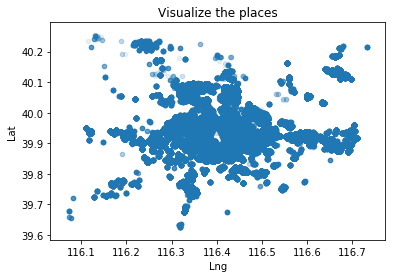

In [12]:
Lng_Lat.plot(kind="scatter", x="Lng", y="Lat", alpha=0.1)
plt.title("Visualize the places")

(5)将含缺失值字段的整条数据删除

In [13]:
data = data.dropna(axis=0)

In [14]:
data.shape

(297775, 20)

In [15]:
data.count()

Lng                    297775
Lat                    297775
tradeTime              297775
followers              297775
totalPrice             297775
square                 297775
bedRoom                297775
drawingRoom            297775
kitchen                297775
bathRoom               297775
floor                  297775
buildingType           297775
constructionTime       297775
renovationCondition    297775
buildingStructure      297775
ladderRatio            297775
elevator               297775
fiveYearsProperty      297775
subway                 297775
district               297775
dtype: int64

(6)查看数据分布直方图

In [16]:
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,bedRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district
0,116.122491,39.939735,2010-1-1,0,165.0,120.45,3,1,0,1,高 12,3.0,2008,4,6,0.333,1,0,0,12
1,116.122150,39.932268,2010-1-5,0,72.5,68.75,2,1,0,1,高 6,4.0,1998,3,2,0.500,0,0,0,12
2,116.111318,39.949921,2010-1-15,0,114.0,89.94,2,1,0,1,底 6,4.0,2003,3,2,0.500,0,0,0,12
3,116.119651,39.934504,2010-1-16,0,84.0,71.73,1,1,0,1,中 11,4.0,2005,3,6,0.333,1,0,0,12
4,116.121964,39.939762,2010-1-18,0,80.0,65.63,2,1,0,1,高 6,4.0,2003,3,2,0.500,0,0,0,12


Text(0,0.5,'num')

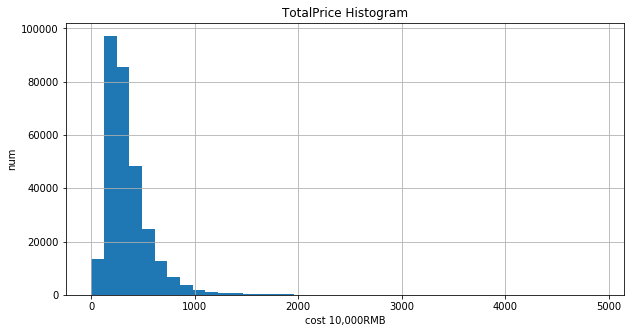

In [17]:
data["totalPrice"].hist(bins=40, figsize=(10,5))
plt.title("TotalPrice Histogram")
plt.xlabel("cost 10,000RMB")
plt.ylabel("num")

房价主要集中在200-500万。

(7)查看经纬度区域信息

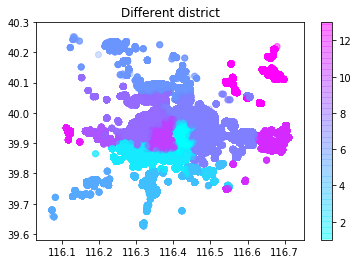

In [18]:
plt.scatter(data["Lng"], data["Lat"], alpha=0.3, c=data["district"], cmap=plt.get_cmap("cool"))
plt.title("Different district")
plt.colorbar()

（8）查看经纬度价格信息

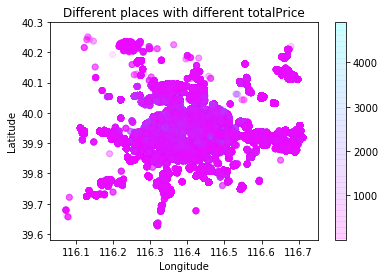

In [19]:
plt.scatter(data["Lng"], data["Lat"], alpha=0.1, c=data["totalPrice"], cmap=plt.get_cmap("cool_r"))
plt.title("Different places with different totalPrice")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()

（9）查看价格的分布图和累计概率图

根据变量的累积概率对应于所指定的理论分布累积概率绘制的散点图，用于直观地检测样本数据是否符合某一概率分布。如果被检验的数据符合所指定的分布，则代表样本数据的点应当基本在代表理论分布的对角线上。

In [20]:
import scipy.stats as stats

In [21]:
import seaborn as sns

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


偏度Skewness： 2.857300143068288
峰值Kurtosis： 17.735970894703737


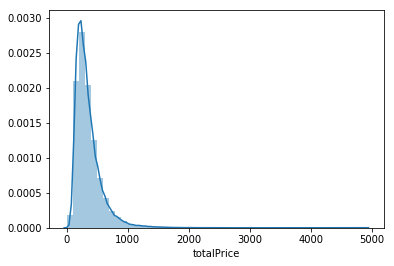

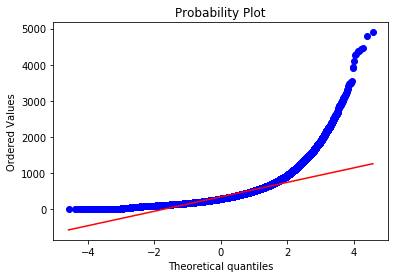

In [22]:
sns.distplot(data["totalPrice"], kde=True)
fig = plt.figure()
res = stats.probplot(data["totalPrice"], plot=plt)
print("偏度Skewness：", data["totalPrice"].skew())
print("峰值Kurtosis：", data["totalPrice"].kurt())

**<font size=4>2. 数据预处理</font>**

（1）考虑到floor字段既有字符，又有数字，不便于处理，将这两个字段分开处理。拆分成：

In [23]:
floordata = data["floor"]

In [24]:
floordataarray = floordata.values

In [25]:
 floordataarray[0].split(" ")

['高', '12']

In [26]:
fm = floordataarray.shape[0]

In [27]:
fm

297775

In [28]:
floorloc = []
floorlayer = []

In [29]:
for i in range(fm):
    floorlist = floordataarray[i].split(" ")
    floorloc.append(floorlist[0])
    floorlayer.append(int(floorlist[1]))

In [30]:
len(floorloc),len(floorlayer)

(297775, 297775)

In [31]:
floorlocDF = pd.DataFrame(floorloc, columns=["floorloc"])
floorlayerDF = pd.DataFrame(floorlayer, columns=["floorlayer"])

In [32]:
floorlocDF.head()

,floorloc
0,高
1,高
2,底
3,中
4,高


In [33]:
floorlayerDF.head()

,floorlayer
0,12
1,6
2,6
3,11
4,6


In [34]:
floorlayerDF.shape

(297775, 1)

In [35]:
floorlocDF.shape

(297775, 1)

In [36]:
data.shape

(297775, 20)

In [37]:
floorlocDF.count()

floorloc    297775
dtype: int64

In [38]:
floorlayerDF.count()

floorlayer    297775
dtype: int64

In [39]:
data = data.reset_index()

In [40]:
data = pd.concat([data, floorlocDF, floorlayerDF], axis=1, join_axes=[data.index])

In [41]:
data.shape

(297775, 23)

In [42]:
data = data.drop(["floor"], axis=1)

In [43]:
data.shape

(297775, 22)

In [44]:
data.count()

index                  297775
Lng                    297775
Lat                    297775
tradeTime              297775
followers              297775
totalPrice             297775
square                 297775
bedRoom                297775
drawingRoom            297775
kitchen                297775
bathRoom               297775
buildingType           297775
constructionTime       297775
renovationCondition    297775
buildingStructure      297775
ladderRatio            297775
elevator               297775
fiveYearsProperty      297775
subway                 297775
district               297775
floorloc               297775
floorlayer             297775
dtype: int64

In [45]:
data.head()

,index,Lng,Lat,tradeTime,followers,totalPrice,square,bedRoom,drawingRoom,kitchen,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,floorloc,floorlayer
0,0,116.122491,39.939735,2010-1-1,0,165.0,120.45,3,1,0,...,2008,4,6,0.333,1,0,0,12,高,12
1,1,116.122150,39.932268,2010-1-5,0,72.5,68.75,2,1,0,...,1998,3,2,0.500,0,0,0,12,高,6
2,2,116.111318,39.949921,2010-1-15,0,114.0,89.94,2,1,0,...,2003,3,2,0.500,0,0,0,12,底,6
3,3,116.119651,39.934504,2010-1-16,0,84.0,71.73,1,1,0,...,2005,3,6,0.333,1,0,0,12,中,11
4,4,116.121964,39.939762,2010-1-18,0,80.0,65.63,2,1,0,...,2003,3,2,0.500,0,0,0,12,高,6


In [46]:
data.count()

index                  297775
Lng                    297775
Lat                    297775
tradeTime              297775
followers              297775
totalPrice             297775
square                 297775
bedRoom                297775
drawingRoom            297775
kitchen                297775
bathRoom               297775
buildingType           297775
constructionTime       297775
renovationCondition    297775
buildingStructure      297775
ladderRatio            297775
elevator               297775
fiveYearsProperty      297775
subway                 297775
district               297775
floorloc               297775
floorlayer             297775
dtype: int64

(2)对floorloc字段使用one-hot编码

In [47]:
data["floorloc"].value_counts()

中     112131
高      65379
低      59695
顶      35653
底      23928
未知       989
Name: floorloc, dtype: int64

发现这个字段共有6种类型

将其他类别字段也按照one-hot进行编码处理

In [48]:
data = pd.get_dummies(data, columns=["floorloc", "buildingType", "renovationCondition", "buildingStructure"])

In [49]:
data.head()

,index,Lng,Lat,tradeTime,followers,totalPrice,square,bedRoom,drawingRoom,kitchen,...,renovationCondition_1,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_1,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6
0,0,116.122491,39.939735,2010-1-1,0,165.0,120.45,3,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1,116.122150,39.932268,2010-1-5,0,72.5,68.75,2,1,0,...,0,0,1,0,0,1,0,0,0,0
2,2,116.111318,39.949921,2010-1-15,0,114.0,89.94,2,1,0,...,0,0,1,0,0,1,0,0,0,0
3,3,116.119651,39.934504,2010-1-16,0,84.0,71.73,1,1,0,...,0,0,1,0,0,0,0,0,0,1
4,4,116.121964,39.939762,2010-1-18,0,80.0,65.63,2,1,0,...,0,0,1,0,0,1,0,0,0,0


（4）绘制房价随时间变化的图像

In [50]:
price = data[["tradeTime", "totalPrice"]]

In [51]:
price

,tradeTime,totalPrice
0,2010-1-1,165.0
1,2010-1-5,72.5
2,2010-1-15,114.0
3,2010-1-16,84.0
4,2010-1-18,80.0
5,2010-1-24,110.0
6,2010-1-24,163.0
7,2010-1-24,141.5
8,2010-1-27,69.0
9,2010-1-29,51.0


In [52]:
group = price.groupby(price["tradeTime"])

In [53]:
means = group.mean()["totalPrice"]

通过group.mean()方法计算出来的均值是Series类型的，需要手动转化为DataFrame类型

In [54]:
meanData = pd.DataFrame(means, columns=["totalPrice"])

In [55]:
meanData.head()

,totalPrice
tradeTime,
2010-1-1,165.000000
2010-1-15,114.000000
2010-1-16,84.000000
2010-1-18,80.000000
2010-1-24,138.166667


索引就是每天的日期数据，存储为datetime，此时是index索引类型，需要手动转换

In [56]:
datetime = meanData.index.values

In [57]:
datetimeDF = pd.DataFrame(datetime, columns=["datetime"])

和meanData合并，此时需要充值meanData的索引

In [58]:
meanData.reset_index(inplace=True,drop=True)

In [59]:
meanprice = pd.concat([datetimeDF, meanData], axis=1, join_axes=[datetimeDF.index])

In [60]:
meanprice.head()

,datetime,totalPrice
0,2010-1-1,165.000000
1,2010-1-15,114.000000
2,2010-1-16,84.000000
3,2010-1-18,80.000000
4,2010-1-24,138.166667


In [61]:
meanprice.shape

(2545, 2)

考虑到绘制每日的数据量有点太大了，改为计算每月的均值

In [62]:
meanprice["datetime"] = pd.to_datetime(meanprice["datetime"], format="%Y-%m-%d")

In [63]:
meanprice["year"] = pd.DatetimeIndex(meanprice.datetime).year
meanprice["month"] = pd.DatetimeIndex(meanprice.datetime).month

In [64]:
meanprice["month"] = meanprice["month"].map(lambda x:("%02d")%x)

In [65]:
meanprice["datetime"] = meanprice["year"].map(str) + meanprice["month"].map(str)

In [66]:
meanprice.head()

,datetime,totalPrice,year,month
0,201001,165.000000,2010,01
1,201001,114.000000,2010,01
2,201001,84.000000,2010,01
3,201001,80.000000,2010,01
4,201001,138.166667,2010,01


In [67]:
meanprice = meanprice.drop(["year", "month"], axis=1)

In [68]:
group = meanprice.groupby(meanprice["datetime"])

In [69]:
means = group.mean()["totalPrice"]

In [70]:
meanData = pd.DataFrame(means, columns=["totalPrice"])

In [71]:
meanData.head()

,totalPrice
datetime,
201001,95.712963
201002,97.383333
201003,109.418478
201004,144.325641
201005,135.000000


In [72]:
datetime = meanData.index.values

In [73]:
datetimeDF = pd.DataFrame(datetime, columns=["datetime"])

In [74]:
meanData.reset_index(inplace=True,drop=True)

In [75]:
meanprice = pd.concat([datetimeDF, meanData], axis=1, join_axes=[datetimeDF.index])

In [76]:
meanprice.head()

,datetime,totalPrice
0,201001,95.712963
1,201002,97.383333
2,201003,109.418478
3,201004,144.325641
4,201005,135.000000


In [77]:
meanprice.shape

(97, 2)

In [78]:
meanprice["datetime"] = pd.to_datetime(meanprice["datetime"], format="%Y%m")

In [79]:
meanprice = meanprice.set_index("datetime")

In [80]:
meandataIndex = meanprice.index

In [81]:
meandataIndex.max()

Timestamp('2018-01-01 00:00:00')

In [82]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [83]:
xticks = pd.date_range(start=meandataIndex.min(), end = meandataIndex.max(), freq="Y")
plt.figure(figsize=(10,5))
plt.xticks(xticks, xticks.strftime("%Y"), rotation=0, ha="center")
plt.plot(meanprice["totalPrice"],linewidth=1, color="blue")
plt.xlabel("Time")
plt.ylabel("price 10,000RMB")
plt.title("the average transaction in every month during 8 years")

Text(0.5,1,'the average transaction in every month during 8 years')

（5）对data数据的时间格式进行处理，提取出年份和月

In [84]:
data["tradeTime"] = pd.to_datetime(data["tradeTime"], format="%Y-%m-%d")

In [85]:
data["tradeYear"] = pd.DatetimeIndex(data.tradeTime).year

In [86]:
data["tradeMonth"] = pd.DatetimeIndex(data.tradeTime).month

粒度到月即可，之后山区tradeTime字段

In [87]:
data = data.drop(["tradeTime"], axis=1)

In [88]:
data.columns

Index(['index', 'Lng', 'Lat', 'followers', 'totalPrice', 'square', 'bedRoom',
       'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime', 'ladderRatio',
       'elevator', 'fiveYearsProperty', 'subway', 'district', 'floorlayer',
       'floorloc_中', 'floorloc_低', 'floorloc_底', 'floorloc_未知', 'floorloc_顶',
       'floorloc_高', 'buildingType_1.0', 'buildingType_2.0',
       'buildingType_3.0', 'buildingType_4.0', 'renovationCondition_1',
       'renovationCondition_2', 'renovationCondition_3',
       'renovationCondition_4', 'buildingStructure_1', 'buildingStructure_2',
       'buildingStructure_3', 'buildingStructure_4', 'buildingStructure_5',
       'buildingStructure_6', 'tradeYear', 'tradeMonth'],
      dtype='object')

In [89]:
data.shape

(297775, 39)

In [90]:
data.count()

index                    297775
Lng                      297775
Lat                      297775
followers                297775
totalPrice               297775
square                   297775
bedRoom                  297775
drawingRoom              297775
kitchen                  297775
bathRoom                 297775
constructionTime         297775
ladderRatio              297775
elevator                 297775
fiveYearsProperty        297775
subway                   297775
district                 297775
floorlayer               297775
floorloc_中               297775
floorloc_低               297775
floorloc_底               297775
floorloc_未知              297775
floorloc_顶               297775
floorloc_高               297775
buildingType_1.0         297775
buildingType_2.0         297775
buildingType_3.0         297775
buildingType_4.0         297775
renovationCondition_1    297775
renovationCondition_2    297775
renovationCondition_3    297775
renovationCondition_4    297775
building

建造年份的时间也要处理一下，目前是object类型

In [91]:
data["constructionTime"] = data["constructionTime"].map(int)

In [92]:
data.head()

,index,Lng,Lat,followers,totalPrice,square,bedRoom,drawingRoom,kitchen,bathRoom,...,renovationCondition_3,renovationCondition_4,buildingStructure_1,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,tradeYear,tradeMonth
0,0,116.122491,39.939735,0,165.0,120.45,3,1,0,1,...,0,1,0,0,0,0,0,1,2010,1
1,1,116.122150,39.932268,0,72.5,68.75,2,1,0,1,...,1,0,0,1,0,0,0,0,2010,1
2,2,116.111318,39.949921,0,114.0,89.94,2,1,0,1,...,1,0,0,1,0,0,0,0,2010,1
3,3,116.119651,39.934504,0,84.0,71.73,1,1,0,1,...,1,0,0,0,0,0,0,1,2010,1
4,4,116.121964,39.939762,0,80.0,65.63,2,1,0,1,...,1,0,0,1,0,0,0,0,2010,1


In [93]:
data["constructionTime"].head()

0    2008
1    1998
2    2003
3    2005
4    2003
Name: constructionTime, dtype: int64

(6)有点乱，拍下顺序，把时间放在前面：

In [94]:
orderlist = ['Lng', 'Lat', 'tradeYear', 'tradeMonth',  'followers', 'totalPrice', 'square', 'bedRoom',
       'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime', 'ladderRatio',
       'elevator', 'fiveYearsProperty', 'subway', 'district', 'floorlayer',
       'floorloc_中', 'floorloc_低', 'floorloc_底', 'floorloc_未知', 'floorloc_顶',
       'floorloc_高', 'buildingType_1.0', 'buildingType_2.0',
       'buildingType_3.0', 'buildingType_4.0', 'renovationCondition_1',
       'renovationCondition_2', 'renovationCondition_3',
       'renovationCondition_4', 'buildingStructure_1', 'buildingStructure_2',
       'buildingStructure_3', 'buildingStructure_4', 'buildingStructure_5',
       'buildingStructure_6', ]

In [95]:
data = data[orderlist]

In [96]:
data.head()

,Lng,Lat,tradeYear,tradeMonth,followers,totalPrice,square,bedRoom,drawingRoom,kitchen,...,renovationCondition_1,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_1,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6
0,116.122491,39.939735,2010,1,0,165.0,120.45,3,1,0,...,0,0,0,1,0,0,0,0,0,1
1,116.122150,39.932268,2010,1,0,72.5,68.75,2,1,0,...,0,0,1,0,0,1,0,0,0,0
2,116.111318,39.949921,2010,1,0,114.0,89.94,2,1,0,...,0,0,1,0,0,1,0,0,0,0
3,116.119651,39.934504,2010,1,0,84.0,71.73,1,1,0,...,0,0,1,0,0,0,0,0,0,1
4,116.121964,39.939762,2010,1,0,80.0,65.63,2,1,0,...,0,0,1,0,0,1,0,0,0,0


查看不同年份间的面积-价格变化情况

In [97]:
yeardata = data[["tradeYear", "tradeMonth", "square", "totalPrice"]]

In [98]:
yeardata.head()

,tradeYear,tradeMonth,square,totalPrice
0,2010,1,120.45,165.0
1,2010,1,68.75,72.5
2,2010,1,89.94,114.0
3,2010,1,71.73,84.0
4,2010,1,65.63,80.0


In [99]:
year2010 = yeardata[yeardata["tradeYear"] == 2010]
year2011 = yeardata[yeardata["tradeYear"] == 2011]
year2012 = yeardata[yeardata["tradeYear"] == 2012]
year2013 = yeardata[yeardata["tradeYear"] == 2013]
year2014 = yeardata[yeardata["tradeYear"] == 2014]
year2015 = yeardata[yeardata["tradeYear"] == 2015]
year2016 = yeardata[yeardata["tradeYear"] == 2016]
year2017 = yeardata[yeardata["tradeYear"] == 2017]

In [100]:
year2010 = year2010.sort_values(by="square" , ascending=True) 
year2011 = year2011.sort_values(by="square" , ascending=True) 
year2012 = year2012.sort_values(by="square" , ascending=True) 
year2013 = year2013.sort_values(by="square" , ascending=True) 
year2014 = year2014.sort_values(by="square" , ascending=True) 
year2015 = year2015.sort_values(by="square" , ascending=True) 
year2016 = year2016.sort_values(by="square" , ascending=True) 
year2017 = year2017.sort_values(by="square" , ascending=True) 

In [101]:
year2010.head()

,tradeYear,tradeMonth,square,totalPrice
49,2010,3,43.22,62.0
142,2010,11,43.22,78.0
19,2010,2,43.22,56.5
67,2010,4,45.32,79.0
11,2010,1,46.38,60.0


In [102]:
listBins = [0, 10, 50, 100, 200, 500, 1000]

In [103]:
listLabels = ["0_10","10_50","50_100","100_200","200_500","500_1000"]

In [104]:
year2010["square"] = pd.cut(year2010['square'], bins=listBins, labels=listLabels, include_lowest=True)
year2011["square"] = pd.cut(year2011['square'], bins=listBins, labels=listLabels, include_lowest=True)
year2012["square"] = pd.cut(year2012['square'], bins=listBins, labels=listLabels, include_lowest=True)
year2013["square"] = pd.cut(year2013['square'], bins=listBins, labels=listLabels, include_lowest=True)
year2014["square"] = pd.cut(year2014['square'], bins=listBins, labels=listLabels, include_lowest=True)
year2015["square"] = pd.cut(year2015['square'], bins=listBins, labels=listLabels, include_lowest=True)
year2016["square"] = pd.cut(year2016['square'], bins=listBins, labels=listLabels, include_lowest=True)
year2017["square"] = pd.cut(year2017['square'], bins=listBins, labels=listLabels, include_lowest=True)

In [105]:
year2015.head()

,tradeYear,tradeMonth,square,totalPrice
136235,2015,7,0_10,88.0
136236,2015,7,0_10,93.0
119500,2015,4,0_10,133.0
108134,2015,1,0_10,21.7
162875,2015,12,10_50,95.0


In [106]:
group2010 = year2010.groupby(year2010["square"])
group2011 = year2011.groupby(year2011["square"])
group2012 = year2012.groupby(year2012["square"])
group2013 = year2013.groupby(year2013["square"])
group2014 = year2014.groupby(year2014["square"])
group2015 = year2015.groupby(year2015["square"])
group2016 = year2016.groupby(year2016["square"])
group2017 = year2017.groupby(year2017["square"])

In [107]:
mean2010 = group2010.mean()["totalPrice"]
mean2011 = group2011.mean()["totalPrice"]
mean2012 = group2012.mean()["totalPrice"]
mean2013 = group2013.mean()["totalPrice"]
mean2014 = group2014.mean()["totalPrice"]
mean2015 = group2015.mean()["totalPrice"]
mean2016 = group2016.mean()["totalPrice"]
mean2017 = group2017.mean()["totalPrice"]

In [108]:
mean2010 = pd.DataFrame(mean2010, columns=["totalPrice"])
mean2011 = pd.DataFrame(mean2011, columns=["totalPrice"])
mean2012 = pd.DataFrame(mean2012, columns=["totalPrice"])
mean2013 = pd.DataFrame(mean2013, columns=["totalPrice"])
mean2014 = pd.DataFrame(mean2014, columns=["totalPrice"])
mean2015 = pd.DataFrame(mean2015, columns=["totalPrice"])
mean2016 = pd.DataFrame(mean2016, columns=["totalPrice"])
mean2017 = pd.DataFrame(mean2017, columns=["totalPrice"])

In [109]:
mean2017.head()

,totalPrice
square,
0_10,NaN
10_50,335.531455
50_100,476.395727
100_200,764.291018
200_500,1571.329011


In [110]:
mean2010 = mean2010.reset_index()
mean2011 = mean2011.reset_index()
mean2012 = mean2012.reset_index()
mean2013 = mean2013.reset_index()
mean2014 = mean2014.reset_index()
mean2015 = mean2015.reset_index()
mean2016 = mean2016.reset_index()
mean2017 = mean2017.reset_index()

In [111]:
mean2010

,square,totalPrice
0,0_10,NaN
1,10_50,62.125000
2,50_100,123.548148
3,100_200,200.323529
4,200_500,NaN
5,500_1000,NaN


In [112]:
mean2010["totalPrice"].fillna(0, inplace = True)
mean2011["totalPrice"].fillna(0, inplace = True)
mean2012["totalPrice"].fillna(0, inplace = True)
mean2013["totalPrice"].fillna(0, inplace = True)
mean2014["totalPrice"].fillna(0, inplace = True)
mean2015["totalPrice"].fillna(0, inplace = True)
mean2016["totalPrice"].fillna(0, inplace = True)
mean2017["totalPrice"].fillna(0, inplace = True)

In [113]:
labelBins = [0, 10, 50, 100, 200, 500]

In [114]:
plt.plot(labelBins, mean2010["totalPrice"], label="2010")
plt.plot(labelBins, mean2011["totalPrice"], label="2011")
plt.plot(labelBins, mean2012["totalPrice"], label="2012")
plt.plot(labelBins, mean2013["totalPrice"], label="2013")
plt.plot(labelBins, mean2014["totalPrice"], label="2014")
plt.plot(labelBins, mean2015["totalPrice"], label="2015")
plt.plot(labelBins, mean2016["totalPrice"], label="2016")
plt.plot(labelBins, mean2017["totalPrice"], label="2017")
plt.title("square-Price with different years")
plt.xlabel("square m3")
plt.ylabel("price 10,000RMB")
plt.legend()

**<font size=4>3. 相关性分析</font>**

（1）利用pd.corr()得到数据集的各个特征之间的相关系数矩阵

In [115]:
corr = data.corr()

In [116]:
corr["totalPrice"].sort_values(ascending=False)

totalPrice               1.000000
square                   0.559936
bathRoom                 0.430571
bedRoom                  0.427240
tradeYear                0.411084
drawingRoom              0.315325
renovationCondition_4    0.217588
elevator                 0.209762
buildingStructure_6      0.200662
floorlayer               0.167923
followers                0.160462
constructionTime         0.123129
subway                   0.117104
kitchen                  0.084920
buildingType_3.0         0.074460
buildingType_1.0         0.039629
floorloc_低               0.027166
renovationCondition_3    0.026353
floorloc_高               0.015530
Lat                      0.014538
renovationCondition_2    0.013720
district                 0.013001
floorloc_中               0.012494
floorloc_未知              0.002798
buildingStructure_5      0.000917
ladderRatio             -0.001136
tradeMonth              -0.004091
buildingStructure_1     -0.005084
buildingStructure_3     -0.007774
fiveYearsPrope

根据相关性 删除一部分属性

In [117]:
droplist = ["kitchen", "buildingType_3.0","buildingType_1.0","renovationCondition_3","Lat","renovationCondition_2","floorloc_中","floorloc_未知","buildingStructure_5",
            "ladderRatio","buildingStructure_1","buildingStructure_3","fiveYearsProperty","buildingType_2.0","buildingStructure_4","floorloc_顶","Lng"]

In [118]:
data = data.drop(droplist, axis=1)

In [119]:
data.columns

Index(['tradeYear', 'tradeMonth', 'followers', 'totalPrice', 'square',
       'bedRoom', 'drawingRoom', 'bathRoom', 'constructionTime', 'elevator',
       'subway', 'district', 'floorlayer', 'floorloc_低', 'floorloc_底',
       'floorloc_高', 'buildingType_4.0', 'renovationCondition_1',
       'renovationCondition_4', 'buildingStructure_2', 'buildingStructure_6'],
      dtype='object')

In [120]:
data = data.drop(['floorloc_低','floorloc_底','floorloc_高'], axis=1)

In [121]:
data = data.drop(['buildingType_4.0'], axis=1)

In [122]:
corr = data.corr()

In [123]:
corr["totalPrice"].sort_values(ascending=False)

totalPrice               1.000000
square                   0.559936
bathRoom                 0.430571
bedRoom                  0.427240
tradeYear                0.411084
drawingRoom              0.315325
renovationCondition_4    0.217588
elevator                 0.209762
buildingStructure_6      0.200662
floorlayer               0.167923
followers                0.160462
constructionTime         0.123129
subway                   0.117104
district                 0.013001
tradeMonth              -0.004091
buildingStructure_2     -0.184020
renovationCondition_1   -0.244917
Name: totalPrice, dtype: float64

In [124]:
featurenames = data.columns.values

绘制热力图

In [125]:
fig = plt.figure("Correlation Figure")
plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=False, square=True, cmap="Blues", fmt=".2f", 
            xticklabels=featurenames, yticklabels=featurenames)
plt.title("Correlation heatmap")

Text(0.5,1,'Correlation heatmap')

（2）查看出售价格和房屋大小的相关性

In [126]:
from pandas.plotting import scatter_matrix

In [127]:
data.plot(kind="scatter", x="square", y="totalPrice", alpha=0.1)
plt.title("the correlation of square and totalPrice")

Text(0.5,1,'the correlation of square and totalPrice')

**<font size=4>4. 划分数据集</font>**

In [128]:
data.columns

Index(['tradeYear', 'tradeMonth', 'followers', 'totalPrice', 'square',
       'bedRoom', 'drawingRoom', 'bathRoom', 'constructionTime', 'elevator',
       'subway', 'district', 'floorlayer', 'renovationCondition_1',
       'renovationCondition_4', 'buildingStructure_2', 'buildingStructure_6'],
      dtype='object')

In [129]:
data["district"].value_counts()

7     101142
6      35806
8      35492
10     29280
2      27832
1      15963
4      14387
11     12117
9      10426
13      8879
5       2623
3       2209
12      1619
Name: district, dtype: int64

将价格单独提取出来

In [130]:
pricearray = data["totalPrice"].values

In [133]:
data = data.drop(["totalPrice"], axis=1)

KeyError: "labels ['totalPrice'] not contained in axis"

In [135]:
example_data = data.iloc[170980:297556]

In [136]:
from sklearn.model_selection import StratifiedShuffleSplit

In [137]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [138]:
for train_index, test_index in split.split(example_data, example_data["district"]):
    train_data = data.loc[train_index]
    test_data = data.loc[test_index]
    indextrain = train_index
    indextest = test_index

In [139]:
y_train = pricearray[train_index]

In [140]:
y_test = pricearray[test_index]

In [141]:
test_data["district"].value_counts()/len(test_data)

7     0.330423
8     0.130431
6     0.109456
10    0.106257
2     0.092827
1     0.049968
4     0.048507
11    0.046058
9     0.038987
13    0.035432
12    0.005925
3     0.005293
5     0.000435
Name: district, dtype: float64

**<font size=4>5.构建机器学习模型</font>**

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [143]:
from sklearn.pipeline import Pipeline

（1）数据标准化

In [144]:
standard = StandardScaler()

In [145]:
scale_train_data = train_data.iloc[:,2:]

In [151]:
scale_test_data = test_data.iloc[:,2:]

In [146]:
standard.fit(scale_train_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [148]:
scaled_train_data = standard.transform(scale_train_data)

In [149]:
train_data.iloc[:,2:] = scaled_train_data

In [150]:
train_data.head()

,tradeYear,tradeMonth,followers,square,bedRoom,drawingRoom,bathRoom,constructionTime,elevator,subway,district,floorlayer,renovationCondition_1,renovationCondition_4,buildingStructure_2,buildingStructure_6
16213,2012,5,-0.466905,-0.840602,-1.339035,-0.409023,-0.433095,-0.542313,0.898182,-1.244804,0.040392,0.675022,0.666560,-0.464743,-0.792382,0.880197
63613,2013,8,-0.048065,-0.912350,-1.339035,-0.409023,-0.433095,-0.893537,0.898182,0.803339,1.087797,0.675022,0.666560,-0.464743,-0.792382,0.880197
56469,2013,5,-0.466905,-0.368116,-0.010965,-0.409023,-0.433095,-0.542313,-1.113361,-1.244804,-1.007013,-0.899494,0.666560,-0.464743,1.262017,-1.136109
110943,2015,3,-0.187678,0.038164,-0.010965,-0.409023,-0.433095,1.447955,0.898182,-1.244804,1.436932,1.724700,-1.500241,2.151728,-0.792382,0.880197
65905,2013,9,0.231161,-1.040971,-1.339035,-2.390542,-0.433095,1.213805,0.898182,-1.244804,-0.308743,1.331071,0.666560,-0.464743,-0.792382,0.880197


In [152]:
scaled_test_data = standard.transform(scale_test_data)

In [153]:
test_data.iloc[:,2:] = standard.transform(scaled_test_data)

In [158]:
train_array = train_data.values 

In [159]:
test_array = test_data.values

（2）构建模型

In [160]:
from sklearn.model_selection import GridSearchCV

首先，利用SVR模型查看下结果

In [165]:
svr = SVR(kernel="rbf", C=0.1)

In [ ]:
svr.fit(train_data, y_train)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


利用随机森林查看下结果

In [164]:
svr.score(test_array, y_test)

-0.0203268143566806

利用

In [1]:
final_RMSE = 144.5

In [2]:
print("The test rmse on the test set:", final_RMSE)

The test rmse on the test set: 144.5
